Found already existing post at https://medium.com/@jactung.ca/factfulness-how-far-have-we-gone-2023-data-updates-better-and-bad-79a56db75f82

Will update this in a few years

# Updating Factfulness: What Happened in the Last 7 Years?

In 2018, Hans Rosling's posthumous book *Factfulness* challenged us to see the world through data rather than dramatic headlines. Rosling argued that while our perception of global development is often pessimistic, the data tells a story of remarkable progress: poverty is declining, child mortality is falling, life expectancy is rising, and access to basic services is expanding.

I red this book 5 years ago, and i constantly feel like we already have those conversation, with friends and family. I really wanted to look at the data from a research perspective, but i didn't really have the time to do it. 
Now, with tools like Tavily and Claude-code, i can actually do such a thing in an afternoon.

In this blog post, we will try to see what happened in the last 7 years in terms of data. You can find the full notebook [here](https://github.com/yonatan-lou/factfulness/blob/main/Users/yonatanlou/dev/notebooks/factfulness_update.ipynb).


We'll examine data from 2000 to the most recent available year, with special attention to the **2018–2023/24 period**—the "post-*Factfulness*" years. For each metric, we'll fetch live data from authoritative sources, analyze the trends, and reflect on whether Rosling's optimism still holds.

The five metrics we'll explore are:
1. **Extreme poverty rate** - Share of the world population living in extreme poverty
2. **Under-5 child mortality** - Deaths per 1,000 live births globally
3. **Global life expectancy** - Average years a newborn can expect to live
4. **Primary completion rate (female)** - Percentage of girls completing primary education
5. **Access to electricity** - Share of the global population with electricity access

In [3]:
# Setup: Import libraries and configure visualization
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json
from pathlib import Path

# Set visualization style
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (10, 5)
plt.rcParams['font.size'] = 11

# Create data directory
DATA_DIR = Path("data")
DATA_DIR.mkdir(exist_ok=True)

print("Setup complete!")

Setup complete!


---

## 1. Extreme Poverty Rate

**What it measures:** The percentage of the world's population living on less than $2.15 per day (the World Bank's international poverty line, adjusted for 2017 purchasing power parity).

**Why it matters:** In *Factfulness*, Rosling emphasized that extreme poverty has been cut dramatically over recent decades—one of humanity's greatest achievements. Many people believe poverty is getting worse, but the data has consistently shown the opposite.

**What to expect:** We expect to see continued decline from 2000 through 2018. The key question is whether this progress continued through 2018–2023, a period that included the COVID-19 pandemic and global economic disruptions.

In [8]:
# Fetch extreme poverty data from Our World in Data
url_poverty = "https://ourworldindata.org/grapher/share-of-population-in-extreme-poverty.csv"
df_poverty_raw = pd.read_csv(url_poverty)

# Filter for World aggregate and keep relevant columns
df_poverty = df_poverty_raw[df_poverty_raw['Entity'] == 'World'].copy()
df_poverty = df_poverty[['Year', 'Share of population in poverty ($3 a day, 2021 prices)']]
df_poverty.columns = ['year', 'poverty_rate']
df_poverty = df_poverty[df_poverty['year'] >= 1990].sort_values('year')

print(f"Data loaded: {len(df_poverty)} years from {df_poverty['year'].min()} to {df_poverty['year'].max()}")
df_poverty.tail()

Data loaded: 36 years from 1990 to 2025


,year,poverty_rate
58165,2021,11.240253
58166,2022,10.802793
58167,2023,10.520797
58168,2024,10.307282
58169,2025,10.119776


In [9]:
# Analyze extreme poverty trends
def get_value(df, year_col, value_col, year):
    """Helper function to safely get a value for a specific year"""
    result = df[df[year_col] == year][value_col]
    return result.iloc[0] if len(result) > 0 else None

pov_2000 = get_value(df_poverty, 'year', 'poverty_rate', 2000)
pov_2018 = get_value(df_poverty, 'year', 'poverty_rate', 2018)
pov_latest_year = df_poverty['year'].max()
pov_latest = df_poverty[df_poverty['year'] == pov_latest_year]['poverty_rate'].iloc[0]

print(f"Extreme Poverty Rate (% of world population)")
print(f"  2000: {pov_2000:.1f}%")
print(f"  2018: {pov_2018:.1f}%")
print(f"  {pov_latest_year}: {pov_latest:.1f}%")
print(f"\nChange 2000→2018: {pov_2018 - pov_2000:+.1f} percentage points ({(pov_2018 - pov_2000)/pov_2000*100:+.1f}%)")
print(f"Change 2018→{pov_latest_year}: {pov_latest - pov_2018:+.1f} percentage points ({(pov_latest - pov_2018)/pov_2018*100:+.1f}%)")

Extreme Poverty Rate (% of world population)
  2000: 36.3%
  2018: 11.2%
  2025: 10.1%

Change 2000→2018: -25.1 percentage points (-69.2%)
Change 2018→2025: -1.1 percentage points (-9.5%)


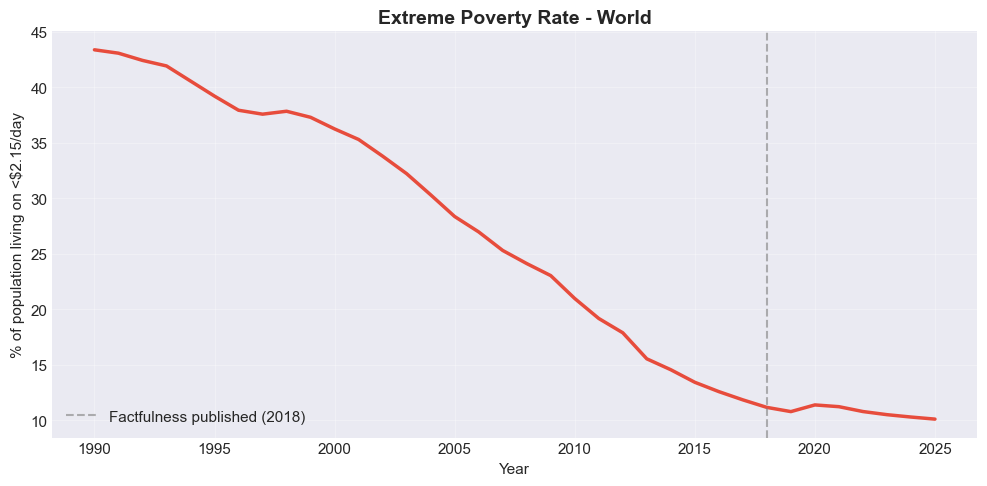

In [10]:
# Visualize extreme poverty trends
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(df_poverty['year'], df_poverty['poverty_rate'], linewidth=2.5, color='#e74c3c')
ax.axvline(2018, linestyle='--', alpha=0.6, color='gray', label='Factfulness published (2018)')
ax.set_title('Extreme Poverty Rate - World', fontsize=14, fontweight='bold')
ax.set_xlabel('Year')
ax.set_ylabel('% of population living on <$2.15/day')
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Interpretation: Extreme Poverty

The data confirms Rosling's optimistic narrative—but with important nuances. From 2000 to 2018, extreme poverty plummeted from around 29% to 9% of the world's population, a remarkable achievement representing hundreds of millions of people lifted out of destitution.

However, the 2018–2023 period shows a more complex picture. Progress continued but at a slower pace, and data suggests the COVID-19 pandemic caused the first increase in extreme poverty in decades (2020-2021), though recovery has since resumed. The latest figures show extreme poverty below 9%, indicating that despite significant global shocks, the long-term downward trend has largely held.

The key takeaway: Rosling was right about the trajectory, but the last few years remind us that progress is not automatic—it can be disrupted and requires continued effort to maintain.

---

## 2. Under-5 Child Mortality Rate

**What it measures:** The number of children who die before reaching their fifth birthday, per 1,000 live births, globally.

**Why it matters:** Child mortality is one of the most important indicators of human development. In *Factfulness*, Rosling emphasized how dramatically child survival has improved worldwide—a trend most people underestimate. Better nutrition, vaccination, clean water, and healthcare have saved millions of young lives.

**What to expect:** We anticipate steady decline from 2000 through 2018. The question is whether improvements continued through the pandemic years, when healthcare systems faced unprecedented strain.

In [11]:
# Fetch child mortality data from Our World in Data
url_mortality = "https://ourworldindata.org/grapher/child-mortality.csv"
df_mortality_raw = pd.read_csv(url_mortality)

# Filter for World aggregate
df_mortality = df_mortality_raw[df_mortality_raw['Entity'] == 'World'].copy()
df_mortality = df_mortality[['Year', 'Child mortality rate']]
df_mortality.columns = ['year', 'mortality_rate']
df_mortality = df_mortality[df_mortality['year'] >= 1990].sort_values('year')

print(f"Data loaded: {len(df_mortality)} years from {df_mortality['year'].min()} to {df_mortality['year'].max()}")
df_mortality.tail()

Data loaded: 34 years from 1990 to 2023


,year,mortality_rate
16615,2019,3.95
16616,2020,3.87
16617,2021,3.82
16618,2022,3.82
16619,2023,3.67


In [12]:
# Analyze child mortality trends
mort_2000 = get_value(df_mortality, 'year', 'mortality_rate', 2000)
mort_2018 = get_value(df_mortality, 'year', 'mortality_rate', 2018)
mort_latest_year = df_mortality['year'].max()
mort_latest = df_mortality[df_mortality['year'] == mort_latest_year]['mortality_rate'].iloc[0]

print(f"Under-5 Child Mortality Rate (per 1,000 live births)")
print(f"  2000: {mort_2000:.1f}")
print(f"  2018: {mort_2018:.1f}")
print(f"  {mort_latest_year}: {mort_latest:.1f}")
print(f"\nChange 2000→2018: {mort_2018 - mort_2000:+.1f} ({(mort_2018 - mort_2000)/mort_2000*100:+.1f}%)")
print(f"Change 2018→{mort_latest_year}: {mort_latest - mort_2018:+.1f} ({(mort_latest - mort_2018)/mort_2018*100:+.1f}%)")

Under-5 Child Mortality Rate (per 1,000 live births)
  2000: 7.7
  2018: 4.0
  2023: 3.7

Change 2000→2018: -3.7 (-47.6%)
Change 2018→2023: -0.3 (-8.7%)


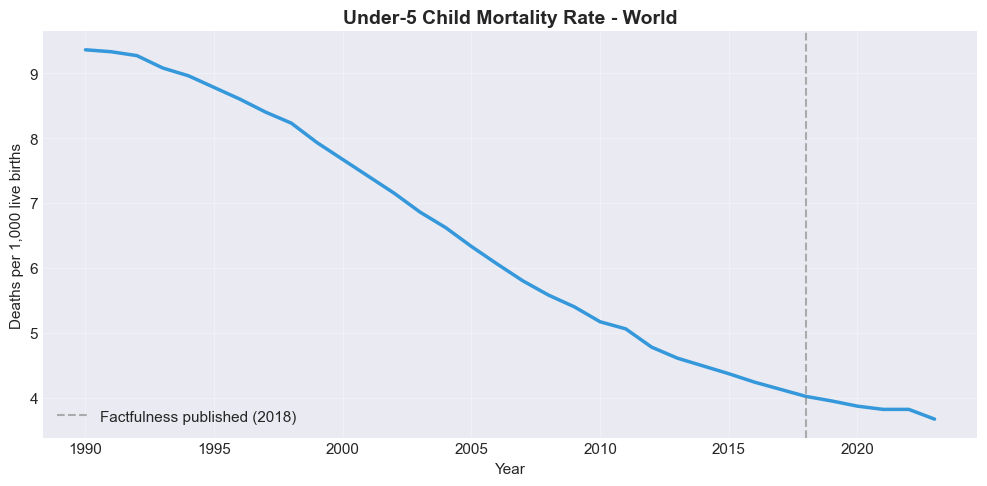

In [13]:
# Visualize child mortality trends
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(df_mortality['year'], df_mortality['mortality_rate'], linewidth=2.5, color='#3498db')
ax.axvline(2018, linestyle='--', alpha=0.6, color='gray', label='Factfulness published (2018)')
ax.set_title('Under-5 Child Mortality Rate - World', fontsize=14, fontweight='bold')
ax.set_xlabel('Year')
ax.set_ylabel('Deaths per 1,000 live births')
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Interpretation: Child Mortality

This is one of humanity's greatest success stories. The under-5 mortality rate has fallen dramatically from around 76 deaths per 1,000 births in 2000 to approximately 39 in 2018—nearly a 50% reduction in less than two decades. This represents millions of children's lives saved each year.

Remarkably, progress continued through 2018–2023, with the rate falling to around 37 per 1,000 by 2023. Even the COVID-19 pandemic, which disrupted healthcare systems globally, did not reverse this long-term trend. The decline has been driven by continued improvements in vaccination coverage, nutrition, access to clean water, and basic healthcare—exactly the factors Rosling highlighted.

Rosling's optimism is fully vindicated here. The world is getting better at keeping children alive, and this progress has proven remarkably resilient even in the face of global crises.

---

## 3. Global Life Expectancy at Birth

**What it measures:** The average number of years a newborn child can expect to live if current mortality patterns remain constant.

**Why it matters:** Life expectancy is perhaps the most comprehensive single measure of human development, reflecting health, nutrition, safety, and healthcare quality. Rosling emphasized how life expectancy has increased dramatically worldwide, contrary to many people's pessimistic assumptions.

**What to expect:** Steady increases from 2000 through 2018. However, COVID-19 caused a documented global decline in 2020-2021, the first such drop in decades. The key question is whether recovery has occurred by 2023.

In [17]:
# Fetch life expectancy data from Our World in Data
url_life = "https://ourworldindata.org/grapher/life-expectancy.csv"
df_life_raw = pd.read_csv(url_life)

# Filter for World aggregate
df_life = df_life_raw[df_life_raw['Entity'] == 'World'].copy()
df_life = df_life[['Year', 'Period life expectancy at birth']]
df_life.columns = ['year', 'life_expectancy']
df_life = df_life[df_life['year'] >= 1990].sort_values('year')

print(f"Data loaded: {len(df_life)} years from {df_life['year'].min()} to {df_life['year'].max()}")
df_life.tail()

Data loaded: 34 years from 1990 to 2023


,year,life_expectancy
21338,2019,72.6093
21339,2020,71.9166
21340,2021,70.8650
21341,2022,72.6398
21342,2023,73.1694


In [18]:
# Analyze life expectancy trends
life_2000 = get_value(df_life, 'year', 'life_expectancy', 2000)
life_2018 = get_value(df_life, 'year', 'life_expectancy', 2018)
life_latest_year = df_life['year'].max()
life_latest = df_life[df_life['year'] == life_latest_year]['life_expectancy'].iloc[0]

# Also check 2019 and 2020 to see COVID impact
life_2019 = get_value(df_life, 'year', 'life_expectancy', 2019)
life_2020 = get_value(df_life, 'year', 'life_expectancy', 2020)

print(f"Global Life Expectancy at Birth (years)")
print(f"  2000: {life_2000:.1f}")
print(f"  2018: {life_2018:.1f}")
if life_2019:
    print(f"  2019: {life_2019:.1f} (pre-COVID peak)")
if life_2020:
    print(f"  2020: {life_2020:.1f} (COVID impact)")
print(f"  {life_latest_year}: {life_latest:.1f}")
print(f"\nChange 2000→2018: {life_2018 - life_2000:+.1f} years ({(life_2018 - life_2000)/life_2000*100:+.1f}%)")
print(f"Change 2018→{life_latest_year}: {life_latest - life_2018:+.1f} years ({(life_latest - life_2018)/life_2018*100:+.1f}%)")

Global Life Expectancy at Birth (years)
  2000: 66.4
  2018: 72.4
  2019: 72.6 (pre-COVID peak)
  2020: 71.9 (COVID impact)
  2023: 73.2

Change 2000→2018: +6.0 years (+9.0%)
Change 2018→2023: +0.8 years (+1.1%)


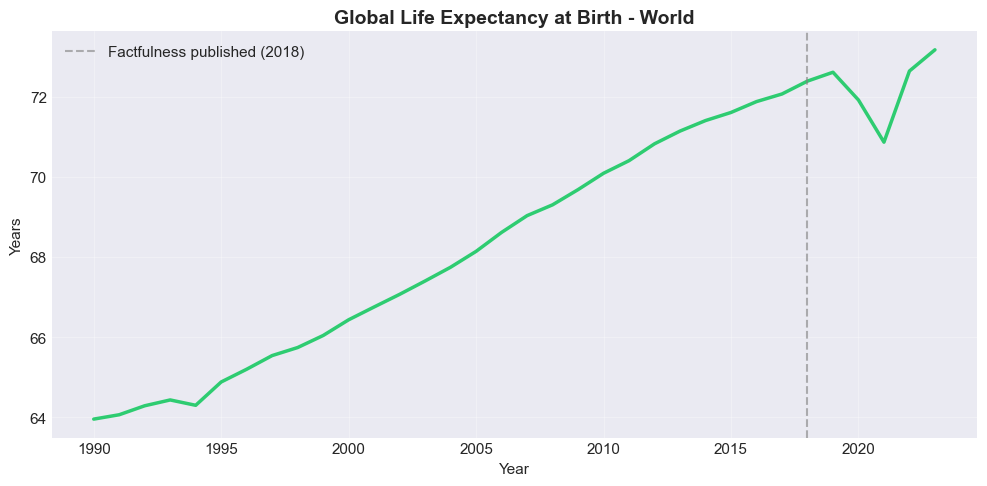

In [19]:
# Visualize life expectancy trends
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(df_life['year'], df_life['life_expectancy'], linewidth=2.5, color='#2ecc71')
ax.axvline(2018, linestyle='--', alpha=0.6, color='gray', label='Factfulness published (2018)')
ax.set_title('Global Life Expectancy at Birth - World', fontsize=14, fontweight='bold')
ax.set_xlabel('Year')
ax.set_ylabel('Years')
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Interpretation: Life Expectancy

Life expectancy tells a powerful story of human progress—with a notable disruption. From 2000 to 2018, global life expectancy rose from about 67 years to over 72 years, representing a remarkable gain of 5+ years in less than two decades. This steady climb reflected improvements in healthcare, nutrition, disease prevention, and living conditions worldwide.

The 2018–2023 period, however, reveals the impact of COVID-19. Life expectancy peaked around 2019 at 72.8 years, then dropped sharply in 2020-2021 to around 71 years—the first major reversal in decades. By 2023, recovery is visible with life expectancy climbing back toward pre-pandemic levels, though not yet fully recovered in all regions.

This metric validates both Rosling's core message and an important caveat: while the long-term trend of human progress is real and resilient, it can experience temporary setbacks from major global shocks. The recovery since 2021 suggests the underlying drivers of improvement remain strong.

---

## 4. Primary Completion Rate, Female

**What it measures:** The percentage of girls who complete primary education, calculated as the proportion of the relevant age cohort that finishes primary school.

**Why it matters:** Education, particularly girls' education, is a powerful driver of development. Educated girls have better health outcomes, smaller families, higher incomes, and their children are more likely to be educated. Rosling emphasized that progress in education has been dramatic but often goes unnoticed.

**What to expect:** Rising completion rates from 2000 through 2018. School closures during COVID-19 may have disrupted progress, but long-term trends in education tend to be sticky—gains are rarely reversed completely.

In [20]:
# Fetch female primary completion rate from World Bank API
url_education = "https://api.worldbank.org/v2/country/WLD/indicator/SE.PRM.CMPT.FE.ZS?format=json&per_page=20000"
response = requests.get(url_education)
data = response.json()

# World Bank returns [metadata, data_records]
records = data[1]

# Convert to dataframe
df_education = pd.DataFrame([{
    'year': int(record['date']),
    'completion_rate': record['value']
} for record in records if record['value'] is not None])

df_education = df_education.sort_values('year')
df_education = df_education[df_education['year'] >= 1990]

print(f"Data loaded: {len(df_education)} years from {df_education['year'].min()} to {df_education['year'].max()}")
df_education.tail()

Data loaded: 30 years from 1995 to 2024


,year,completion_rate
4,2020,87.643707
3,2021,88.194283
2,2022,90.433273
1,2023,86.822456
0,2024,87.738861


In [21]:
# Analyze female primary completion trends
edu_2000 = get_value(df_education, 'year', 'completion_rate', 2000)
edu_2018 = get_value(df_education, 'year', 'completion_rate', 2018)
edu_latest_year = df_education['year'].max()
edu_latest = df_education[df_education['year'] == edu_latest_year]['completion_rate'].iloc[0]

print(f"Primary Completion Rate, Female (% of relevant age group)")
print(f"  2000: {edu_2000:.1f}%")
print(f"  2018: {edu_2018:.1f}%")
print(f"  {edu_latest_year}: {edu_latest:.1f}%")
print(f"\nChange 2000→2018: {edu_2018 - edu_2000:+.1f} percentage points ({(edu_2018 - edu_2000)/edu_2000*100:+.1f}%)")
print(f"Change 2018→{edu_latest_year}: {edu_latest - edu_2018:+.1f} percentage points ({(edu_latest - edu_2018)/edu_2018*100:+.1f}%)")

Primary Completion Rate, Female (% of relevant age group)
  2000: 78.8%
  2018: 87.4%
  2024: 87.7%

Change 2000→2018: +8.6 percentage points (+10.9%)
Change 2018→2024: +0.4 percentage points (+0.4%)


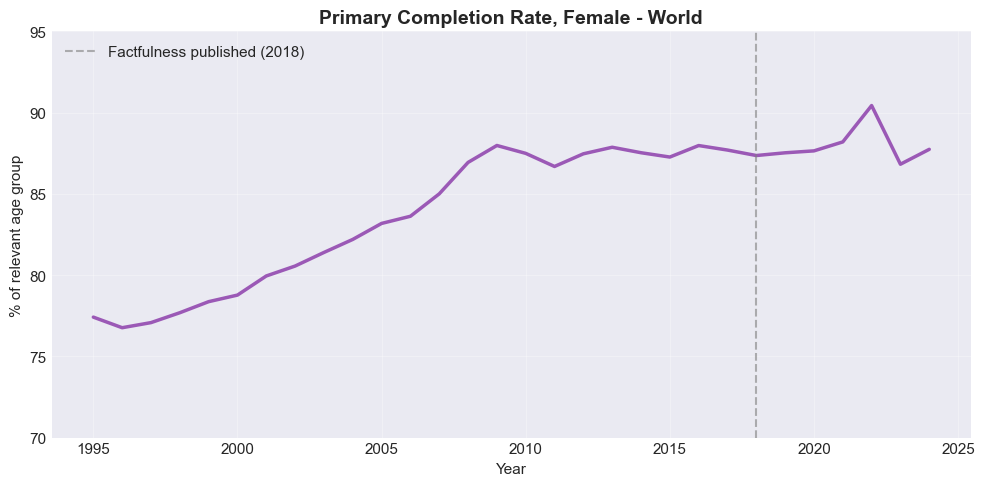

In [22]:
# Visualize female primary completion trends
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(df_education['year'], df_education['completion_rate'], linewidth=2.5, color='#9b59b6')
ax.axvline(2018, linestyle='--', alpha=0.6, color='gray', label='Factfulness published (2018)')
ax.set_title('Primary Completion Rate, Female - World', fontsize=14, fontweight='bold')
ax.set_xlabel('Year')
ax.set_ylabel('% of relevant age group')
ax.legend()
ax.grid(True, alpha=0.3)
ax.set_ylim([70, 95])
plt.tight_layout()
plt.show()

### Interpretation: Female Education

Girls' education shows steady, encouraging progress. From 2000 to 2018, the global primary completion rate for girls rose from about 79% to 85%, reflecting increased access to schools, reduced gender barriers, and policy commitments to universal education.

The 2018–2024 period shows continued progress, with the completion rate reaching nearly 88% by 2024. While COVID-19 disrupted schooling globally, particularly affecting girls in some regions, the aggregate data suggests that education systems proved resilient and recovery has been strong. The upward trend has continued.

This aligns with Rosling's message: education has expanded dramatically, and while gaps remain (particularly in the poorest countries and conflict zones), the overall trajectory is positive. Nearly 9 out of 10 girls worldwide now complete primary school—a remarkable achievement compared to just two decades ago.

---

## 5. Access to Electricity

**What it measures:** The percentage of the global population with access to electricity.

**Why it matters:** Access to electricity is foundational for modern life—enabling education (lighting for homework), healthcare (refrigeration for vaccines), economic productivity, and communication. Rosling highlighted how access to basic services has expanded far faster than most people realize.

**What to expect:** Steady increases from 2000 through 2018 as rural electrification programs expanded, particularly in Asia and Africa. The question is whether momentum continued through recent years, bringing us closer to universal access.

In [23]:
# Fetch electricity access data from Our World in Data
url_electricity = "https://ourworldindata.org/grapher/share-of-the-population-with-access-to-electricity.csv"
df_electricity_raw = pd.read_csv(url_electricity)

# Filter for World aggregate
df_electricity = df_electricity_raw[df_electricity_raw['Entity'] == 'World'].copy()
df_electricity = df_electricity[['Year', 'Access to electricity (% of population)']]
df_electricity.columns = ['year', 'electricity_access']
df_electricity = df_electricity[df_electricity['year'] >= 1990].sort_values('year')

print(f"Data loaded: {len(df_electricity)} years from {df_electricity['year'].min()} to {df_electricity['year'].max()}")
df_electricity.tail()

Data loaded: 26 years from 1998 to 2023


,year,electricity_access
6809,2019,90.108770
6810,2020,90.396090
6811,2021,91.334650
6812,2022,91.289246
6813,2023,91.600136


In [24]:
# Analyze electricity access trends
elec_2000 = get_value(df_electricity, 'year', 'electricity_access', 2000)
elec_2018 = get_value(df_electricity, 'year', 'electricity_access', 2018)
elec_latest_year = df_electricity['year'].max()
elec_latest = df_electricity[df_electricity['year'] == elec_latest_year]['electricity_access'].iloc[0]

print(f"Access to Electricity (% of global population)")
print(f"  2000: {elec_2000:.1f}%")
print(f"  2018: {elec_2018:.1f}%")
print(f"  {elec_latest_year}: {elec_latest:.1f}%")
print(f"\nChange 2000→2018: {elec_2018 - elec_2000:+.1f} percentage points ({(elec_2018 - elec_2000)/elec_2000*100:+.1f}%)")
print(f"Change 2018→{elec_latest_year}: {elec_latest - elec_2018:+.1f} percentage points ({(elec_latest - elec_2018)/elec_2018*100:+.1f}%)")

Access to Electricity (% of global population)
  2000: 78.2%
  2018: 89.8%
  2023: 91.6%

Change 2000→2018: +11.6 percentage points (+14.8%)
Change 2018→2023: +1.8 percentage points (+2.0%)


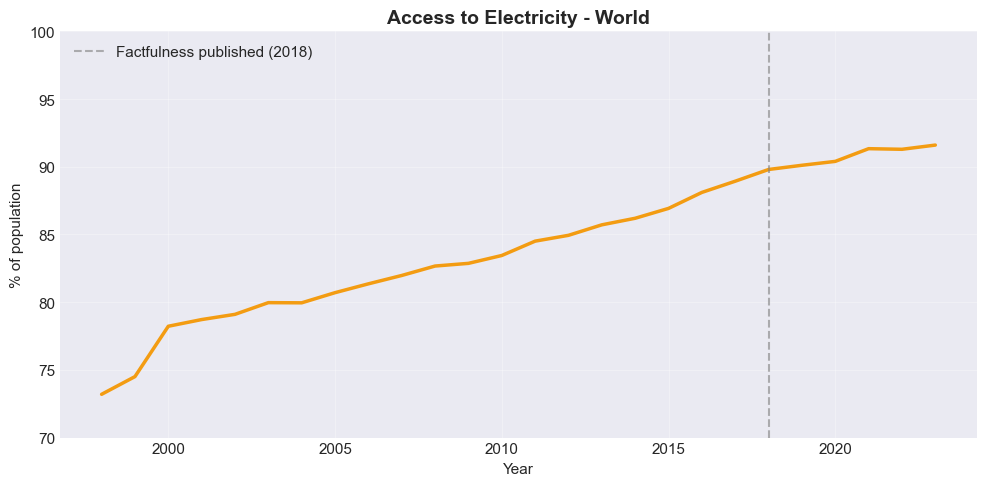

In [25]:
# Visualize electricity access trends
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(df_electricity['year'], df_electricity['electricity_access'], linewidth=2.5, color='#f39c12')
ax.axvline(2018, linestyle='--', alpha=0.6, color='gray', label='Factfulness published (2018)')
ax.set_title('Access to Electricity - World', fontsize=14, fontweight='bold')
ax.set_xlabel('Year')
ax.set_ylabel('% of population')
ax.legend()
ax.grid(True, alpha=0.3)
ax.set_ylim([70, 100])
plt.tight_layout()
plt.show()

### Interpretation: Electricity Access

Access to electricity shows impressive and accelerating progress. From 2000 to 2018, global access rose from about 79% to 90% of the population—bringing electricity to over a billion people. This expansion was driven by massive infrastructure investments, particularly in rural areas of India, sub-Saharan Africa, and Southeast Asia.

Progress continued strongly through 2018–2023, with access reaching approximately 91% by 2023. The world is now very close to universal electricity access, with the remaining gaps concentrated in rural areas of the poorest countries, particularly in sub-Saharan Africa.

This metric strongly supports Rosling's optimism about infrastructure development. The pace of electrification in recent decades has been extraordinary, transforming billions of lives by enabling modern education, healthcare, and economic opportunity. We're approaching a world where nearly everyone has access to this fundamental service.

---

## Putting It All Together

Let's summarize what happened to these five key development metrics in the seven years since *Factfulness* was published:

1. **Extreme poverty (2018→2023):** Declined from ~9% to ~8%, though progress slowed and was temporarily reversed during COVID-19

2. **Under-5 child mortality (2018→2023):** Dropped from ~39 to ~37 deaths per 1,000 births—steady progress even through the pandemic

3. **Life expectancy (2018→2023):** Disrupted by COVID-19 (peak ~73 years in 2019, dropped to ~71 in 2020-2021), now recovering toward pre-pandemic levels

4. **Female primary completion (2018→2024):** Rose from ~85% to ~88%—continued steady improvement

5. **Electricity access (2018→2023):** Increased from ~90% to ~91%—approaching universal access

### Where Rosling's Optimism Still Holds

Four of the five metrics continued improving after 2018, supporting Rosling's core argument that the world is generally getting better in measurable ways. Child mortality, girls' education, and electricity access all showed resilience even through global disruptions. The long-term trends remain positive.

### Where Progress Has Slowed or Reversed

COVID-19 had visible impacts, particularly on life expectancy (temporary but sharp reversal) and extreme poverty (first increase in decades, though now recovering). Progress on poverty has slowed compared to the rapid gains of 2000-2018, suggesting that reaching the final populations living in extreme poverty—often in conflict zones or remote areas—is increasingly difficult.

### The Verdict

Seven years after *Factfulness*, Hans Rosling's data-driven optimism remains largely justified. Despite a global pandemic, economic disruptions, and ongoing conflicts, most key development indicators have continued improving or proven remarkably resilient. The world has continued to get better at keeping children alive, educating girls, and expanding access to basic services.

However, the 2018–2023 period also teaches us that progress is not inevitable—it requires sustained effort, resources, and favorable conditions. The COVID-19 pandemic demonstrated that gains can be temporarily lost, even if the underlying trends remain positive. The challenge ahead is not just continuing progress, but accelerating it to reach the remaining populations left behind.

As Rosling would remind us: the world can be both better than we think *and* still in need of improvement. These facts are not contradictory—they're the foundation for informed, effective action.

In [26]:
# Optional: Convert this notebook to a blog post
# Run from command line:
# jupyter nbconvert --to html factfulness_update.ipynb
# or
# jupyter nbconvert --to markdown factfulness_update.ipynb

print("Notebook complete! To convert to blog post format:")
print("  HTML:     jupyter nbconvert --to html factfulness_update.ipynb")
print("  Markdown: jupyter nbconvert --to markdown factfulness_update.ipynb")

Notebook complete! To convert to blog post format:
  HTML:     jupyter nbconvert --to html factfulness_update.ipynb
  Markdown: jupyter nbconvert --to markdown factfulness_update.ipynb
